# Evaluation metrics

In [18]:
from src.chapter04.metricsUtil import util
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## Binary Classification

In [30]:
# Test tp, tn, fp, fn
l1 = [0,1,1,1,0,0,0,1]
l2 = [0,1,0,1,0,1,0,0]
tn, fp, fn, tp = metrics.confusion_matrix(l1, l2).ravel()
tn1 = util.true_negative(l1, l2)
fp1 = util.false_positive(l1, l2)
fn1 = util.false_negative(l1, l2)
tp1 = util.true_positive(l1, l2)
print("================Confusion Matrix=================")
print("metrics tn: {:3d}\nutil.true_negative: {:3d}".format(tn, tn1))
print("metrics fp: {:3d}\nutil.false_positive: {:3d}".format(fp, fp1))
print("metrics fn: {:3d}\nutil.false_negative: {:3d}".format(fn, fn1))
print("metrics tp: {:3d}\nutil.true_positive: {:3d}".format(tp, tp1))

# Test Accuracy
acc = metrics.accuracy_score(l1, l2)
acc1 = util.accuracy_score(l1, l2)
print("====================Accuracy=====================")
print("metrics.accuracy_score: {:.10f}\nutil.accuracy_score: {:.10f}".format(acc, acc1))
# Test Precision
precision = metrics.precision_score(l1, l2)
precision1 = util.precision_score(l1, l2)
print("===================Precision=====================")
print("metrics.precision_score: {:.10f}\nutil.precision_score: {:.10f}".format(precision, precision1))
# Test Recall
recall = metrics.recall_score(l1, l2)
recall1 = util.recall_score(l1, l2)
print("=====================Recall======================")
print("metrics.recall_score: {:.10f}\nutil.recall_score: {:.10f}".format(recall, recall1))
# Test F1
f1 = metrics.f1_score(l1, l2)
f1_1 = util.f1_score(l1, l2)
print("=======================F1========================")
print("metrics.f1_score: {:.10f}\nutil.f1_score: {:.10f}".format(f1, f1_1))

================Confusion Matrix=================
metrics tn:   3
util.true_negative:   3
metrics fp:   1
util.false_positive:   1
metrics fn:   2
util.false_negative:   2
metrics tp:   2
util.true_positive:   2
====================Accuracy=====================
metrics.accuracy_score: 0.6250000000
util.accuracy_score: 0.6250000000
===================Precision=====================
metrics.precision_score: 0.6666666667
util.precision_score: 0.6666666667
=====================Recall======================
metrics.recall_score: 0.5000000000
util.recall_score: 0.5000000000
=======================F1========================
metrics.f1_score: 0.5714285714
util.f1_score: 0.5714285714


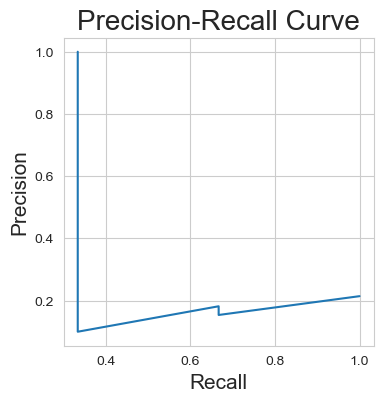

In [25]:
# Plot PR curve
y_true = [0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
          1, 0, 0, 0, 0, 0, 0, 0, 1, 0]
y_pred = [0.02638412, 0.11114267, 0.31620708,
          0.0490937, 0.0191491, 0.17554844,
          0.15952202, 0.03819563, 0.11639273,
          0.079377, 0.08584789, 0.39095342,
          0.27259048, 0.03447096, 0.04644807,
          0.03543574, 0.18521942, 0.05934905,
          0.61977213, 0.33056815]
precisions = []
recalls = []
thresholds = [0.0490937, 0.05934905, 0.079377,
              0.08584789, 0.11114267, 0.11639273,
              0.15952202, 0.17554844, 0.18521942,
              0.27259048, 0.31620708, 0.33056815,
              0.39095342, 0.61977213]
for threshold in thresholds:
    predictions = [1 if y >= threshold else 0 for y in y_pred]
    p = util.precision_score(y_true, predictions)
    r = util.recall_score(y_true, predictions)
    precisions.append(p)
    recalls.append(r)

plt.figure(figsize=(4, 4))
plt.plot(recalls, precisions)
plt.xlabel('Recall', fontsize=15)
plt.ylabel('Precision', fontsize=15)
plt.title('Precision-Recall Curve', fontsize=20)
plt.show()

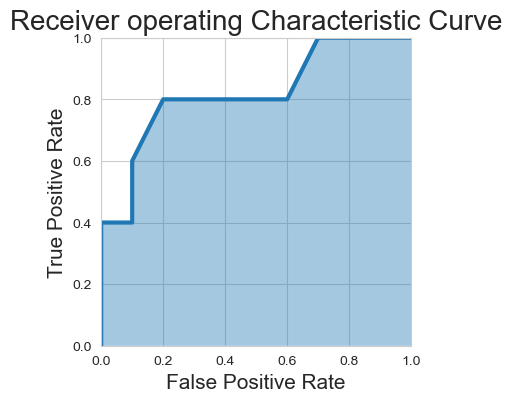

In [29]:
# Plot ROC curve
tpr_list = []
fpr_list = []
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_pred = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
          0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
          0.85, 0.15, 0.99]
thresholds = [0, 0.1, 0.2, 0.3, 0.4, 0.5,
              0.6, 0.7, 0.8, 0.85, 0.9, 0.99, 1.0] 
for thresh in thresholds:
    temp_pred = [1 if x >= thresh else 0 for x in y_pred]
    temp_tpr = util.tpr_score(y_true, temp_pred)
    temp_fpr = util.fpr_score(y_true, temp_pred)
    tpr_list.append(temp_tpr)
    fpr_list.append(temp_fpr)

plt.figure(figsize=(4, 4))
plt.fill_between(fpr_list, tpr_list, alpha=0.4)
plt.plot(fpr_list, tpr_list, lw=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver operating Characteristic Curve', fontsize=20)
plt.show()

In [4]:
# Test Log Loss
y_true = [0, 0, 0, 0, 1, 0, 1,
          0, 0, 1, 0, 1, 0, 0, 1]
y_proba = [0.1, 0.3, 0.2, 0.6, 0.8, 0.05,
           0.9, 0.5, 0.3, 0.66, 0.3, 0.2,
           0.85, 0.15, 0.99]
a = util.log_loss(y_true, y_proba)
b = metrics.log_loss(y_true, y_proba)
print("metrics.log_loss (weighted): {:.10f}\nutil.log_loss: {:.10f}".format(b, a))

metrics.log_loss (weighted): 0.4988271186
util.log_loss: 0.4988271186


## MultiClass Classification

In [10]:
# Test Precision, Recall, F1
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]
print("===================Precision=====================")
a = util.macro_precision(y_true, y_pred)
b = metrics.precision_score(y_true, y_pred, average="macro")
print("metrics.precision_score (macro): {:.10f}\nutil.macro_precision: {:.10f}".format(b, a))
print("--------------------------------------------------")
a = util.micro_precision(y_true, y_pred)
b = metrics.precision_score(y_true, y_pred, average="micro")
print("metrics.precision_score (micro): {:.10f}\nutil.micro_precision: {:.10f}".format(b, a))
print("--------------------------------------------------")
a = util.weighted_precision(y_true, y_pred)
b = metrics.precision_score(y_true, y_pred, average="weighted")
print("metrics.precision_score (weighted): {:.10f}\nutil.weighted_precision: {:.10f}".format(b, a))
print("=====================Recall=======================")
a = util.macro_recall(y_true, y_pred)
b = metrics.recall_score(y_true, y_pred, average="macro")
print("metrics.recall_score (macro): {:.10f}\nutil.macro_recall: {:.10f}".format(b, a))
print("--------------------------------------------------")
a = util.micro_recall(y_true, y_pred)
b = metrics.recall_score(y_true, y_pred, average="micro")
print("metrics.recall_score (micro): {:.10f}\nutil.micro_recall: {:.10f}".format(b, a))
print("--------------------------------------------------")
a = util.weighted_recall(y_true, y_pred)
b = metrics.recall_score(y_true, y_pred, average="weighted")
print("metrics.recall_score (weighted): {:.10f}\nutil.weighted_recall: {:.10f}".format(b, a))
print("=======================F1=========================")
a1 = util.macro_f1(y_true, y_pred)
a2 = util.macro_f1_1(y_true, y_pred)
b = metrics.f1_score(y_true, y_pred, average="macro")
print("metrics.f1_score (macro): {:.10f}\nutil.macro_f1: {:.10f}\nutil.macro_f1_1: {:.10f} [not recommended]".format(b, a1, a2))
print("--------------------------------------------------")
a = util.micro_f1(y_true, y_pred)
b = metrics.f1_score(y_true, y_pred, average="micro")
print("metrics.f1_score (micro): {:.10f}\nutil.micro_f1: {:.10f}".format(b, a))
print("--------------------------------------------------")
a = util.weighted_f1(y_true, y_pred)
b = metrics.f1_score(y_true, y_pred, average="weighted")
print("metrics.f1_score (weighted): {:.10f}\nutil.weighted_f1: {:.10f}".format(b, a))

===================Precision=====================
metrics.precision_score (macro): 0.3611111111
util.macro_precision: 0.3611111111
--------------------------------------------------
metrics.precision_score (micro): 0.4444444444
util.micro_precision: 0.4444444444
--------------------------------------------------
metrics.precision_score (weighted): 0.3981481481
util.weighted_precision: 0.3981481481
=====================Recall=======================
metrics.recall_score (macro): 0.4166666667
util.macro_recall: 0.4166666667
--------------------------------------------------
metrics.recall_score (micro): 0.4444444444
util.micro_recall: 0.4444444444
--------------------------------------------------
metrics.recall_score (weighted): 0.4444444444
util.weighted_recall: 0.4444444444
=======================F1=========================
metrics.f1_score (macro): 0.3809523810
util.macro_f1: 0.3809523810
util.macro_f1_1: 0.3869047619 [not recommended]
-------------------------------------------------

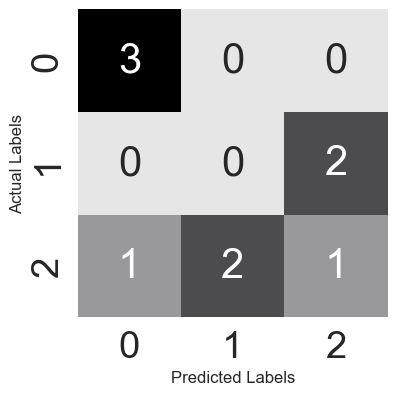

In [14]:
# Test Confusion Matrix
y_true = [0, 1, 2, 0, 1, 2, 0, 2, 2]
y_pred = [0, 2, 1, 0, 2, 1, 0, 0, 2]

cm = metrics.confusion_matrix(y_true, y_pred)
plt.figure(figsize=(4, 4))
cmap = sns.cubehelix_palette(50, hue=0.05, rot=0, light=0.9, dark=0, as_cmap=True)
sns.set(font_scale=2.5)
sns.heatmap(cm, annot=True, cmap=cmap, cbar=False)
plt.ylabel("Actual Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)
plt.show()

## MultiLabel Classification

In [7]:
# Test average precision at k or AP@k
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]
for i in range(len(y_true)):
    for j in range(1, 4):
        print(f"""
y_true={y_true[i]},
y_pred={y_pred[i]},
AP@{j}={util.apk(y_true[i], y_pred[i], k=j)}
""")


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@1=0.0


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@2=0.25


y_true=[1, 2, 3],
y_pred=[0, 1, 2],
AP@3=0.38888888888888884


y_true=[0, 2],
y_pred=[1],
AP@1=0.0


y_true=[0, 2],
y_pred=[1],
AP@2=0.0


y_true=[0, 2],
y_pred=[1],
AP@3=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@1=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@2=0.0


y_true=[1],
y_pred=[0, 2, 3],
AP@3=0.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@1=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@2=1.0


y_true=[2, 3],
y_pred=[2, 3, 4, 0],
AP@3=0.8888888888888888


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@1=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@2=1.0


y_true=[1, 0],
y_pred=[0, 1, 2],
AP@3=0.8888888888888888


y_true=[],
y_pred=[0],
AP@1=0.0


y_true=[],
y_pred=[0],
AP@2=0.0


y_true=[],
y_pred=[0],
AP@3=0.0


In [15]:
# Test mean average precision at k or MAP@k
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]
for i in range(len(y_true)):
    print(f"""mapk@{i}={util.mapk(y_true, y_pred, i)}""")

mapk@0=0.0
mapk@1=0.3333333333333333
mapk@2=0.375
mapk@3=0.3611111111111111
mapk@4=0.34722222222222215
mapk@5=0.33888888888888885


In [33]:
# Test mean column-wise log loss
y_true = [
    [1, 2, 3],
    [0, 2],
    [1],
    [2, 3],
    [1, 0],
    []
]
y_pred = [
    [0, 1, 2],
    [1],
    [0, 2, 3],
    [2, 3, 4, 0],
    [0, 1, 2],
    [0]
]
print(f"""mean column-wise log loss={util.mc_log_loss(y_true, y_pred)}""")

mean column-wise log loss=6.396074147227906
